<a href="https://colab.research.google.com/github/mansi-guptaa/Rossmann-Store-Sales-Prediction/blob/main/Rossmann_Store_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 - Mansi Gupta**


# **Project Summary**

Write the summary here within 500-600 words.

# **GitHub Link**

https://github.com/mansi-guptaa/Rossmann-Store-Sales

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

The challenge is to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, will help store managers stay focused on what’s most important to them: their customers and their teams!

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Dataset Loading

In [ ]:
# Load Dataset
rossman_data = pd.read_csv('https://raw.githubusercontent.com/mansi-guptaa/Rossmann-Store-Sales/refs/heads/main/Data/Rossmann%20Stores%20Data%20(1).csv', low_memory=False)
store_data = pd.read_csv('https://raw.githubusercontent.com/mansi-guptaa/Rossmann-Store-Sales/refs/heads/main/Data/store%20(1).csv')

### Dataset First View

In [ ]:
# Dataset First Look
rossman_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Rossmann Data Shape:', rossman_data.shape)
print('Store Data Shape:', store_data.shape)

Rossmann Data Shape: (1017209, 9)
Store Data Shape: (1115, 10)


### Dataset Information

In [ ]:
# Dataset Info
print('Rossmann Data Info:', rossman_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
Rossmann Data Info: None


In [ ]:
# Dataset Info
print('Store Data Info:', store_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
Store Data Info: None


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print('Rossmann Data duplicate count :', rossman_data.duplicated().sum())

Rossmann Data duplicate count : 0


In [ ]:
# Dataset Duplicate Value Count
print('Store Data duplicate count:', store_data.duplicated().sum())

Store Data duplicate count: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print('Rossmann Data null values :', rossman_data.isnull().sum())

Rossmann Data null values : Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [ ]:
# Missing Values/Null Values Count
print('Store Data null values:', store_data.isnull().sum())

Store Data null values: Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


rossman_data null values  :


<Axes: >

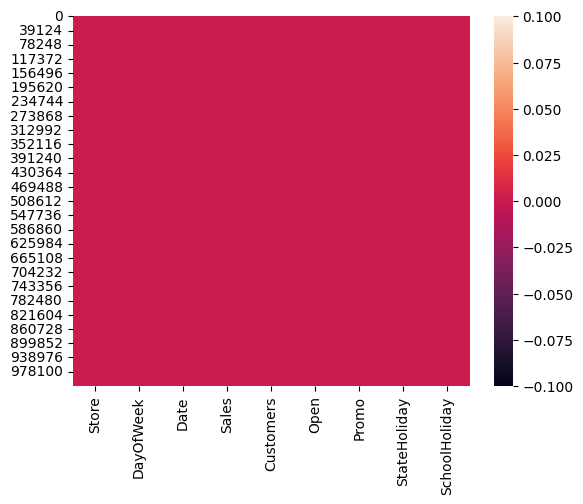

In [ ]:
# Visualizing the missing values
print('rossman_data null values  :')
sns.heatmap(rossman_data.isnull())


store_data null values  :


<Axes: >

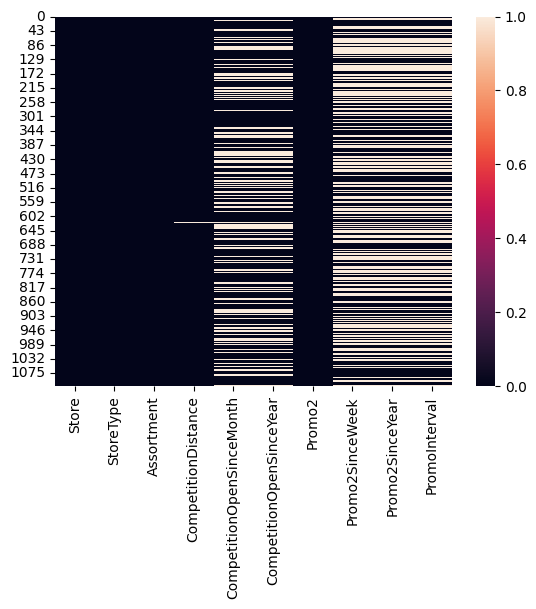

In [ ]:
# Visualizing the missing values
print('store_data null values  :')
sns.heatmap(store_data.isnull())

### What did you know about your dataset?

Rossman data set is clean it has no null or duplicate values while store data contains null and duplicate values

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print('Rossmann Data columns :', rossman_data.columns)

Rossmann Data columns : Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


In [ ]:
# Dataset Columns
print('Store Data colummns :', store_data.columns)

Store Data colummns : Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [ ]:
# Dataset Describe
print('Rossmann statistic summary :')
pd.set_option('display.float_format', '{:.2f}'.format)
rossman_data.describe()

Rossmann statistic summary :


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00


In [ ]:
# Dataset Describe
print('Store Data statistic summary:')
store_data.describe()

Store Data statistic summary:


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1112.00,761.00,761.00,1115.00,571.00,571.00
mean,558.00,5404.90,7.22,2008.67,0.51,23.60,2011.76
std,322.02,7663.17,3.21,6.20,0.50,14.14,1.67
min,1.00,20.00,1.00,1900.00,0.00,1.00,2009.00
25%,279.50,717.50,4.00,2006.00,0.00,13.00,2011.00
50%,558.00,2325.00,8.00,2010.00,1.00,22.00,2012.00
75%,836.50,6882.50,10.00,2013.00,1.00,37.00,2013.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


### Variables Description

Store: Represents the unique identifier for each store.

DayOfWeek: Indicates the day of the week, where 1 = Monday and 7 = Sunday.

Date:The specific date of the transaction in YYYY-MM-DD format.

Sales:The total sales for a particular store on a given date.

Customers:The number of customers who visited the store on a specific day.

Open:Indicates whether the store was open on that day (1 = open, 0 = closed).

Promo:Shows whether the store was running a promotional campaign on that day (1 = promo active, 0 = no promo).

StateHoliday:Indicates whether the day was a state holiday, with values as:

* 0: No holiday
* 'a': Public holiday
* 'b': Easter holiday
* 'c': Christmas holiday

SchoolHoliday: Shows whether the day was a school holiday (1 = yes, 0 = no).

StoreType: Denotes the type of store, with possible categories such as:
'a', 'b', 'c', 'd' (representing different store types, such as different formats or sizes).

Assortment: Indicates the type of assortment or product variety the store offers:
* 'a': Basic
* 'b': Extra
* 'c': Extended

CompetitionDistance: The distance in meters to the nearest competitor store. If the value is missing, the competition does not exist.

CompetitionOpenSinceMonth: The month when the nearest competitor store opened.

CompetitionOpenSinceYear:The year when the nearest competitor store opened.

Promo2:A binary variable indicating whether the store is participating in a continuous promotional campaign (1 = yes, 0 = no).

Promo2SinceWeek: The calendar week when the store started participating in Promo2.

Promo2SinceYear: The year when the store started participating in Promo2.

PromoInterval: Describes the months during which the store runs promotions under Promo2. Possible values can be 'Jan, Apr, Jul, Oct' (representing the start months of the promo).


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in rossman_data.columns.tolist():
  print('No of unique value in', i ,'is', rossman_data[i].nunique())

No of unique value in Store is 1115
No of unique value in DayOfWeek is 7
No of unique value in Date is 942
No of unique value in Sales is 21734
No of unique value in Customers is 4086
No of unique value in Open is 2
No of unique value in Promo is 2
No of unique value in StateHoliday is 4
No of unique value in SchoolHoliday is 2


In [ ]:
# Check Unique Values for each variable.
for i in store_data.columns.tolist():
  print('No if unique value in', i, 'is', store_data[i].nunique())

No if unique value in Store is 1115
No if unique value in StoreType is 4
No if unique value in Assortment is 3
No if unique value in CompetitionDistance is 654
No if unique value in CompetitionOpenSinceMonth is 12
No if unique value in CompetitionOpenSinceYear is 23
No if unique value in Promo2 is 2
No if unique value in Promo2SinceWeek is 24
No if unique value in Promo2SinceYear is 7
No if unique value in PromoInterval is 3


## 3. ***Data Wrangling***

### Data Wrangling Code

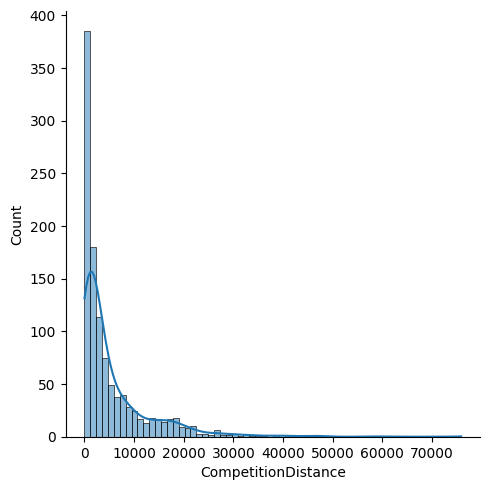

In [ ]:
sns.displot(store_data['CompetitionDistance'], kde = True)

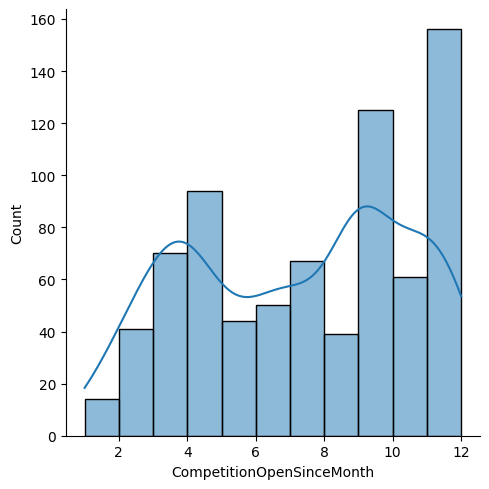

In [ ]:
sns.displot(store_data['CompetitionOpenSinceMonth'], kde = True)

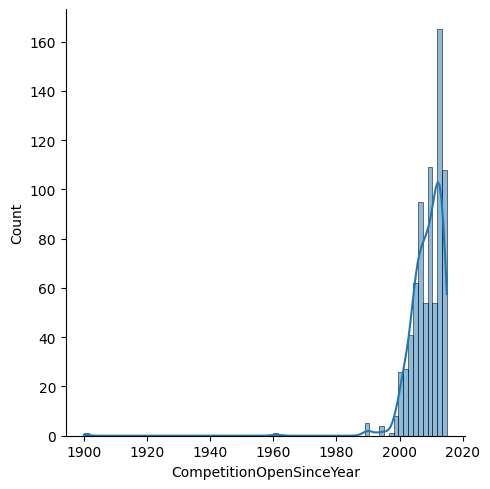

In [ ]:
sns.displot(store_data['CompetitionOpenSinceYear'], kde=True)

In [ ]:
# Write your code to make your dataset analysis ready.
#Filing missing values
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace = True)
store_data['CompetitionOpenSinceMonth'].fillna(store_data['CompetitionOpenSinceMonth'].mean(), inplace = True)
store_data['CompetitionOpenSinceYear'].fillna(store_data['CompetitionOpenSinceYear'].mode()[0], inplace = True)
store_data['Promo2SinceWeek'].fillna(0, inplace = True)
store_data['Promo2SinceYear'].fillna(0, inplace = True)
store_data['PromoInterval'].fillna(0, inplace = True)

In [ ]:
# Write your code to make your dataset analysis ready.
#changing Type of Year and month column in store dataset
store_data['CompetitionOpenSinceMonth'] = store_data['CompetitionOpenSinceMonth'].astype(int)
store_data['CompetitionOpenSinceYear'] = store_data['CompetitionOpenSinceYear'].astype(int)
store_data['Promo2SinceWeek'] = store_data['Promo2SinceWeek'].astype(int)
store_data['Promo2SinceYear'] = store_data['Promo2SinceYear'].astype(int)

In [ ]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9,2008,0,0,0,0
1,2,a,a,570.00,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9,2009,0,0,0,0
4,5,a,a,29910.00,4,2015,0,0,0,0


In [ ]:
rossman_data['Date'] = pd.to_datetime(rossman_data['Date'])
rossman_data['Day'] = rossman_data['Date'].dt.day
rossman_data['Month'] = rossman_data['Date'].dt.month
rossman_data['Year'] = rossman_data['Date'].dt.year

In [ ]:
rossman_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,31,7,2015


In [ ]:
merged_data = pd.merge(rossman_data, store_data, on  = 'Store', how = 'left')
merged_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,...,Year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,31,...,2015,c,a,1270.00,9,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,31,...,2015,a,a,570.00,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,31,...,2015,a,a,14130.00,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,...,2015,c,c,620.00,9,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,31,...,2015,a,a,29910.00,4,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,1,...,2013,a,a,1900.00,6,2014,1,31,2013,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,1,...,2013,c,c,1880.00,4,2006,0,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,1,...,2013,a,c,9260.00,7,2013,0,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,1,...,2013,a,c,870.00,7,2013,0,0,0,0


In [ ]:
df = merged_data.copy()

### What all manipulations have you done and insights you found?

* CompetitionDistance column is left skewed so median imputation method is used

* Since CompetitionOpenSinceMonth is close to normal distribution, mean iputation would be the best.

* Since CompetitionOpenSinceYear is rightly skewed and increase in competition can be due to various external factors over a particular era so mode will be the right imputation method.

* If the Promo2 value is 0 then Promo2SinceWeek, Promo2SinceYear, PromoInterval will also be 0 logically

* The data types of CompetitionOpenSinceMonth, CompetitionOpenSinceYear,Promo2SinceWeek, Promo2SinceYear is changed from whole numbers to integers.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables for Rossmann Data***

#### Chart - 1

Text(0.5, 0, 'Sales')

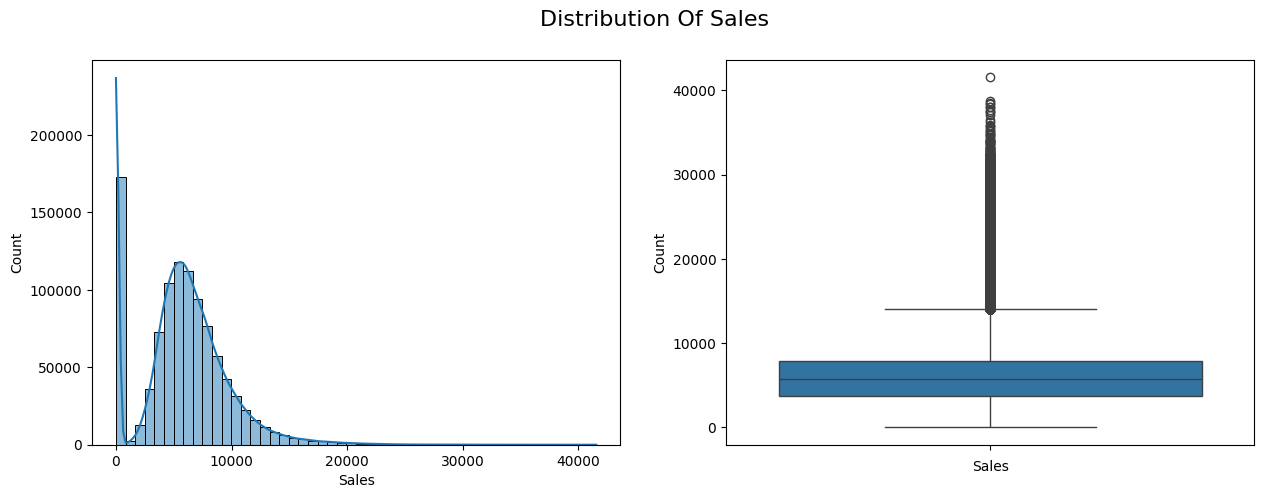

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize = (15,5))
plt.suptitle('Distribution Of Sales', fontsize=16)
plt.subplot(1,2,1)

sns.histplot(rossman_data['Sales'], bins = 50, kde = True)
plt.ylabel('Count')
plt.xlabel('Sales')

plt.subplot(1,2,2)
sns.boxplot(rossman_data['Sales'])
plt.ylabel('Count')
plt.xlabel('Sales')

##### 2. What is/are the insight(s) found from the chart?

Sales are left skewed and full of outliers


#### Chart - 2

Text(0.5, 0, 'Customers')

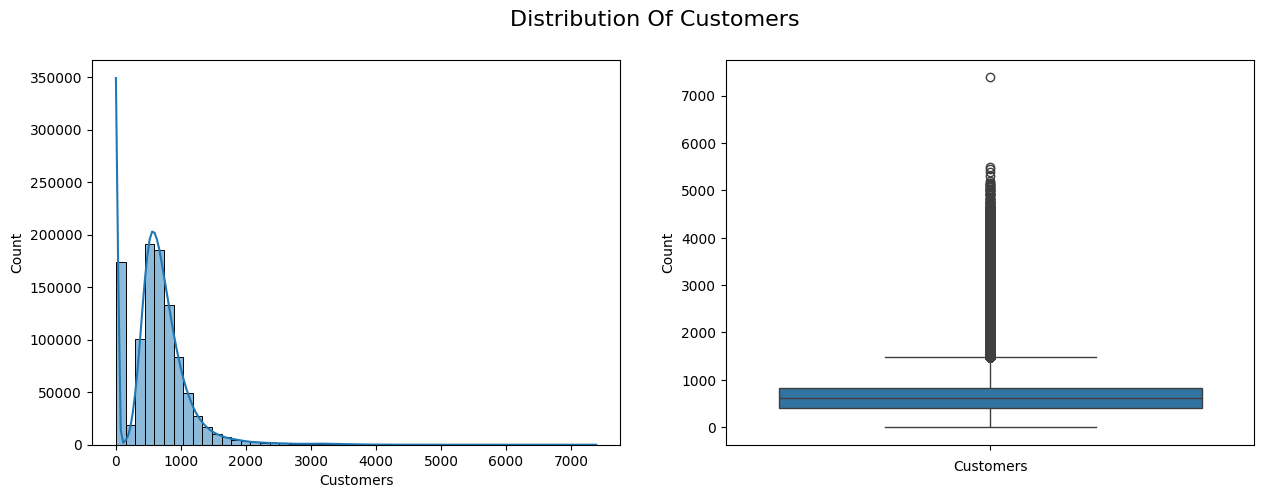

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize = (15,5))
plt.suptitle('Distribution Of Customers', fontsize=16)
plt.subplot(1,2,1)

sns.histplot(rossman_data['Customers'], bins = 50, kde = True)
plt.ylabel('Count')
plt.xlabel('Customers')

plt.subplot(1,2,2)
sns.boxplot(rossman_data['Customers'])
plt.ylabel('Count')
plt.xlabel('Customers')

##### 2. What is/are the insight(s) found from the chart?

Customers data is left skewed and have too much outliers


#### Chart - 3

Text(15.875000000000009, 0.5, 'Customers')

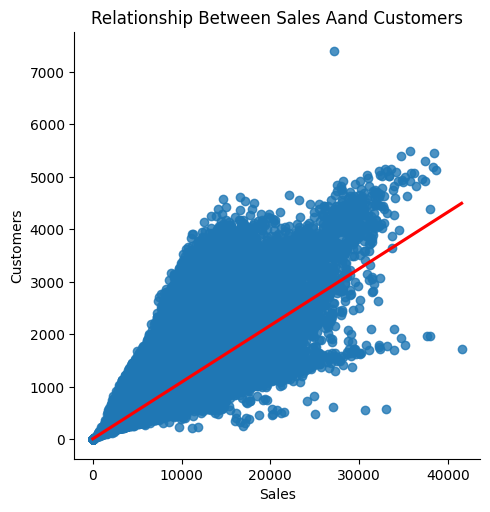

In [ ]:
# Chart - 3 visualization code
sns.lmplot(rossman_data, x = 'Sales', y = 'Customers', line_kws= {'color':'red'})
plt.title('Relationship Between Sales Aand Customers')
plt.xlabel('Sales')
plt.ylabel('Customers')

##### 2. What is/are the insight(s) found from the chart?

The chart shows a positive relationship between sales and customers

#### Chart - 4

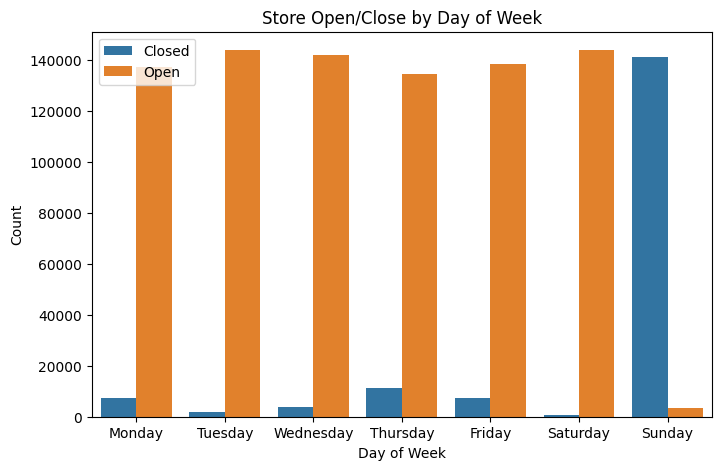

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(8, 5))
sns.countplot(data = rossman_data, x = 'DayOfWeek', hue = 'Open')
plt.title('Store Open/Close by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(['Closed', 'Open'])
plt.show()


##### 2. What is/are the insight(s) found from the chart?

Stores are closed on sundays

#### Chart - 5

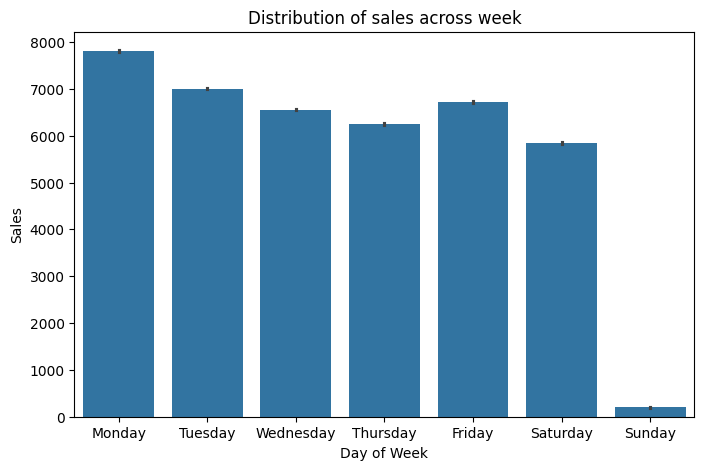

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8, 5))
sns.barplot(data = rossman_data, x = 'DayOfWeek', y = 'Sales')
plt.title('Distribution of sales across week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Sales are less on sunday

#### Chart - 6

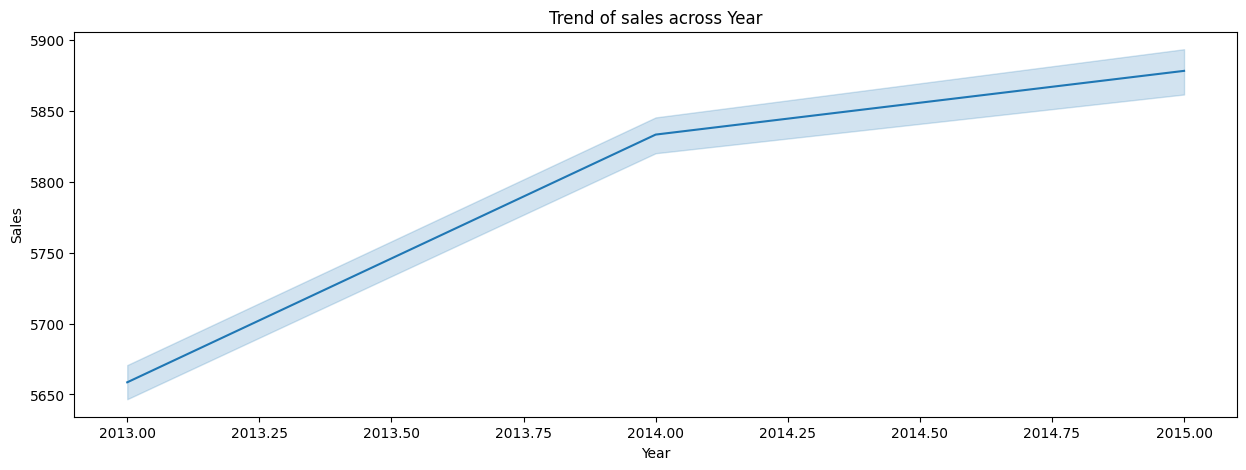

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(15, 5))
sns.lineplot(data = rossman_data, x = 'Year', y = 'Sales')
plt.title('Trend of sales across Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Sales have increased significantly after 2014

#### Chart - 7

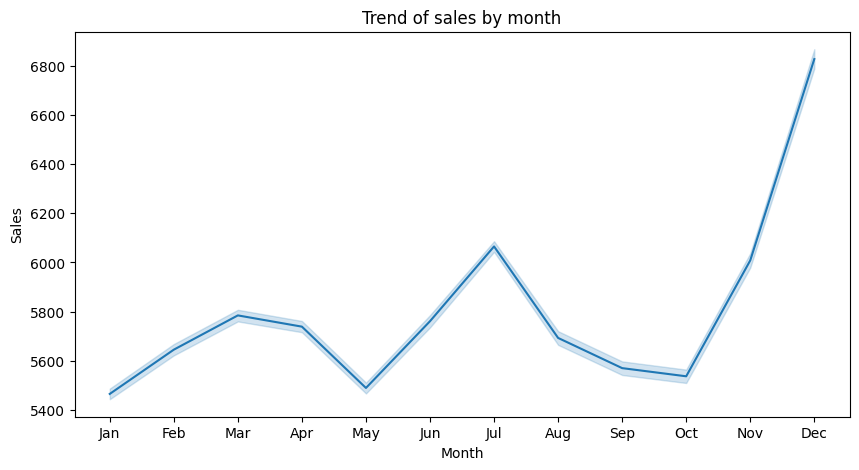

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 5))
sns.lineplot(data = rossman_data, x = 'Month', y = 'Sales')
plt.title('Trend of sales by month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Sales are more at the end of year

#### Chart - 8

In [ ]:
avg_per_day_sale = rossman_data.groupby('Day')['Sales'].mean().reset_index()


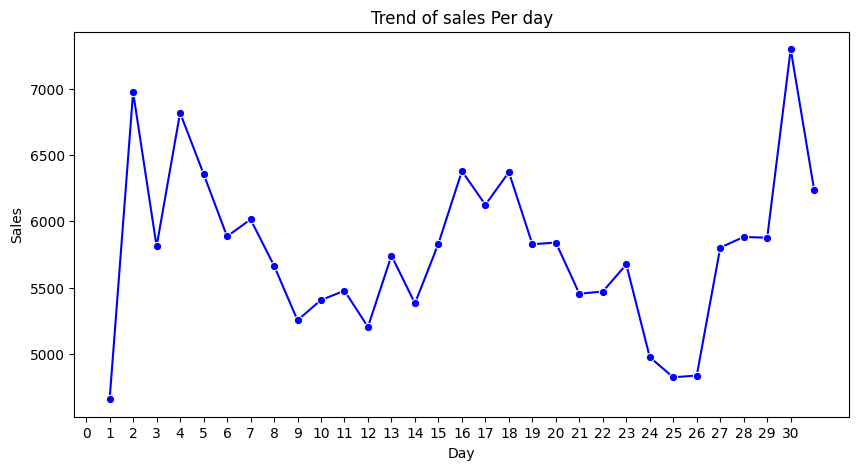

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 5))
sns.lineplot(data = avg_per_day_sale, x = 'Day', y = 'Sales', marker='o', color='blue')
plt.title('Trend of sales Per day')
plt.xticks(ticks=avg_per_day_sale.index, labels=avg_per_day_sale.index)
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

At the end of month sales are high

#### Chart - 9

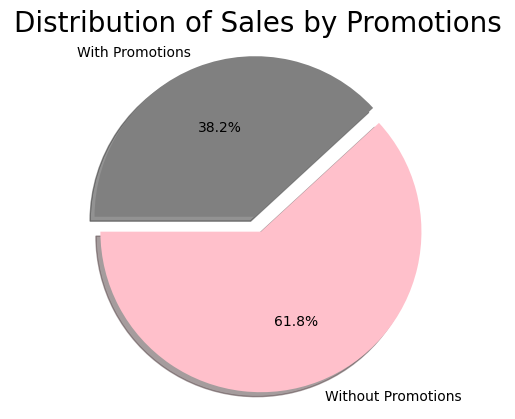

In [ ]:
# Chart - 9 visualization code
plt.pie(rossman_data['Promo'].value_counts(), explode=(0.1, 0.0), labels=['Without Promotions', 'With Promotions'], colors=['Pink', 'Grey'],
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of Sales by Promotions", fontsize=20)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

More percentage of sales without Promotion


#### Chart - 10

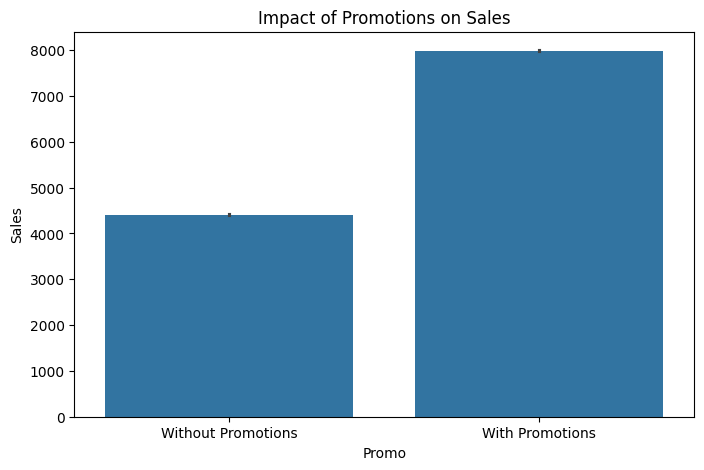

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data = rossman_data, x = 'Promo', y = 'Sales')
plt.title('Impact of Promotions on Sales')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.xticks([0, 1], ['Without Promotions', 'With Promotions'])
plt.show()

Sales more affected by Promotions

#### Chart - 11

In [ ]:
sales_in_holiday = rossman_data[rossman_data['StateHoliday'] != '0']


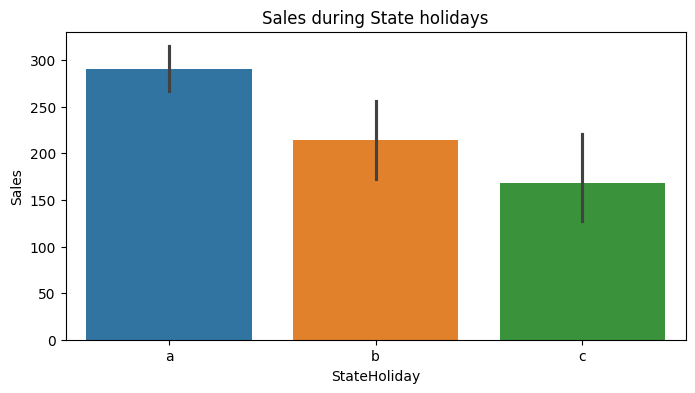

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(data = sales_in_holiday, x = 'StateHoliday', y = 'Sales', hue = 'StateHoliday')
plt.title('Sales during State holidays')
plt.xlabel('StateHoliday')
plt.ylabel('Sales')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

More sales are on stateholiday  'a'

#### Chart - 11

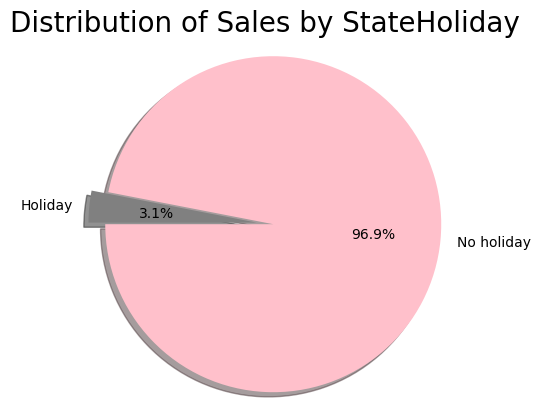

In [ ]:
# Chart - 10 visualization code
plt.pie(rossman_data['StateHoliday'].value_counts(), explode=(0.1, 0.0), labels=['No holiday', 'Holiday'], colors=['Pink', 'Grey'],
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of Sales by StateHoliday", fontsize=20)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

While school holidays have less of a direct impact than state holidays, they can still influence sales.

#### Chart - 10

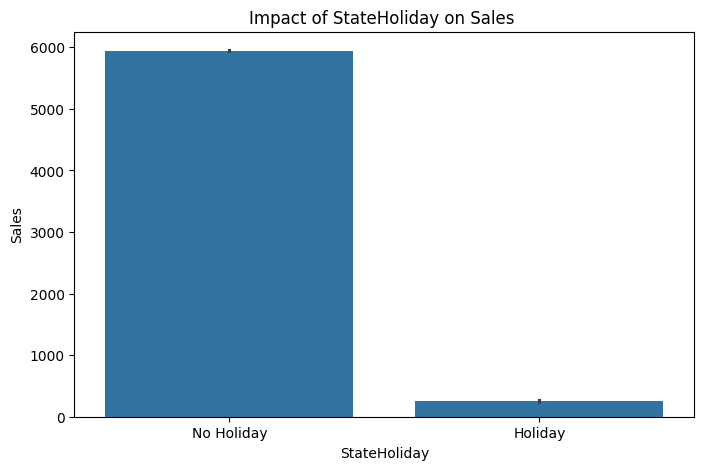

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data = rossman_data, x = 'StateHoliday', y = 'Sales')
plt.title('Impact of StateHoliday on Sales ')
plt.xlabel('StateHoliday')
plt.ylabel('Sales')
plt.xticks([0, 1], ['No Holiday', 'Holiday'])
plt.show()

Sales are most on No  Holidays

#### Chart - 11

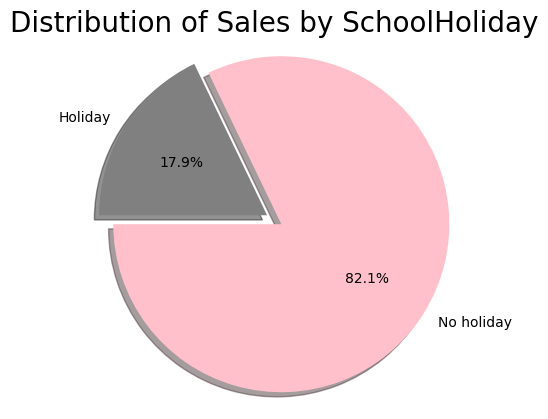

In [ ]:
# Chart - 11 visualization code
plt.pie(rossman_data['SchoolHoliday'].value_counts(), explode=(0.1, 0.0), labels=['No holiday', 'Holiday'], colors=['Pink', 'Grey'],
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of Sales by SchoolHoliday", fontsize=20)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

There are 835,488 instances with SchoolHoliday as 0 (no school holiday) and 181,721 instances with SchoolHoliday as 1 (school holiday).

#### Chart - 10

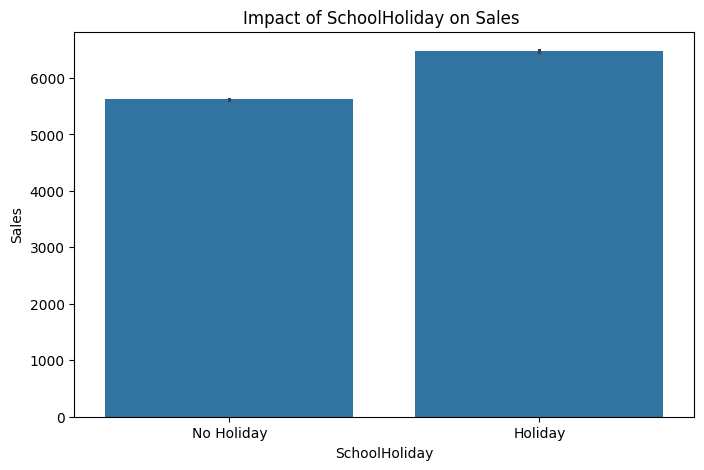

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data = rossman_data, x = 'SchoolHoliday', y = 'Sales')
plt.title('Impact of SchoolHoliday on Sales ')
plt.xlabel('SchoolHoliday')
plt.ylabel('Sales')
plt.xticks([0, 1], ['No Holiday', 'Holiday'])
plt.show()

#### Chart - 12

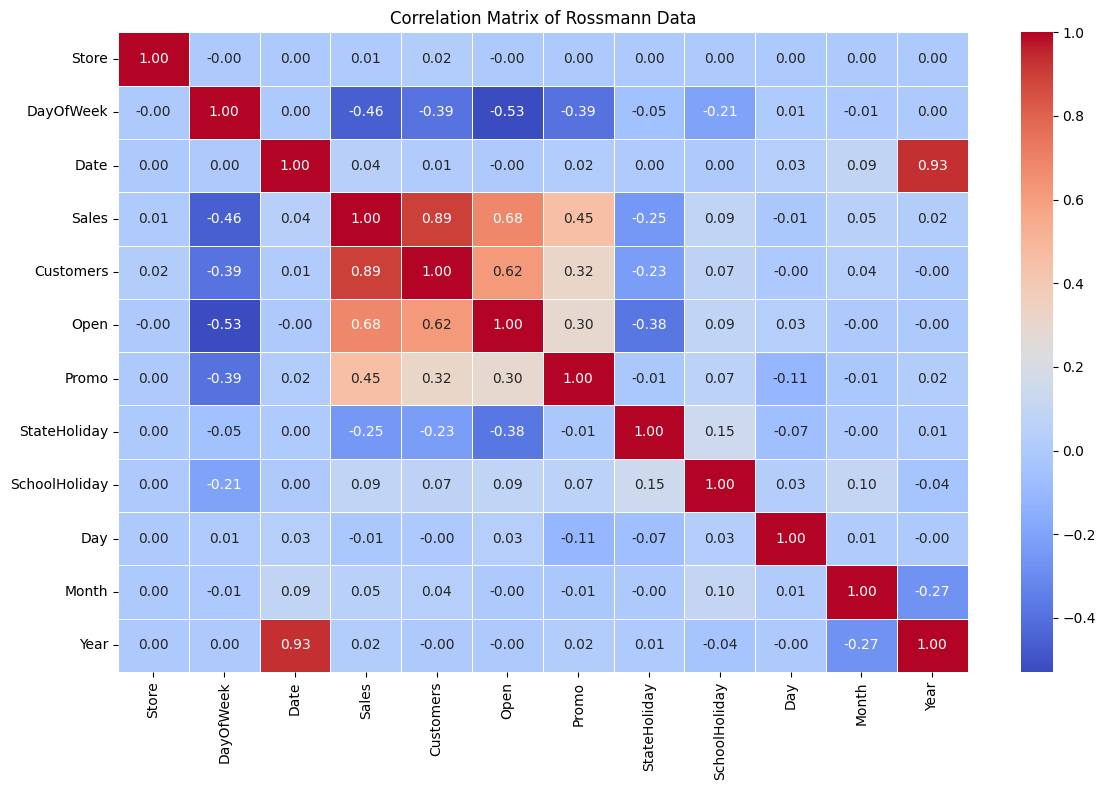

In [ ]:
# Chart - 12 visualization code
# Calculate correlation matrix
correlation_matrix = rossman_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Rossmann Data')
plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Strong positive correlation between sales and customers, open, Promo

## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables for Merged Data***

#### Chart - 13

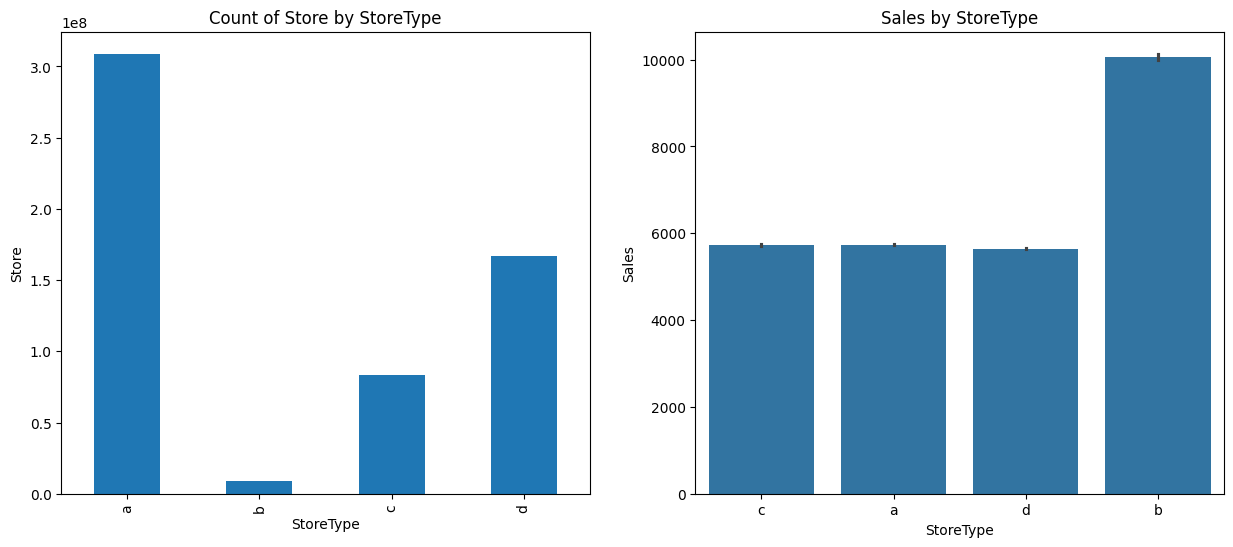

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
df.groupby('StoreType')['Store'].sum().plot(kind = 'bar')
plt.title('Count of Store by StoreType')
plt.xlabel('StoreType')
plt.ylabel('Store')

plt.subplot(1,2,2)
sns.barplot(x = 'StoreType', y = 'Sales', data = df)
plt.title('Sales by StoreType')
plt.xlabel('StoreType')
plt.ylabel('Sales')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Store b has most sales

#### Chart - 14

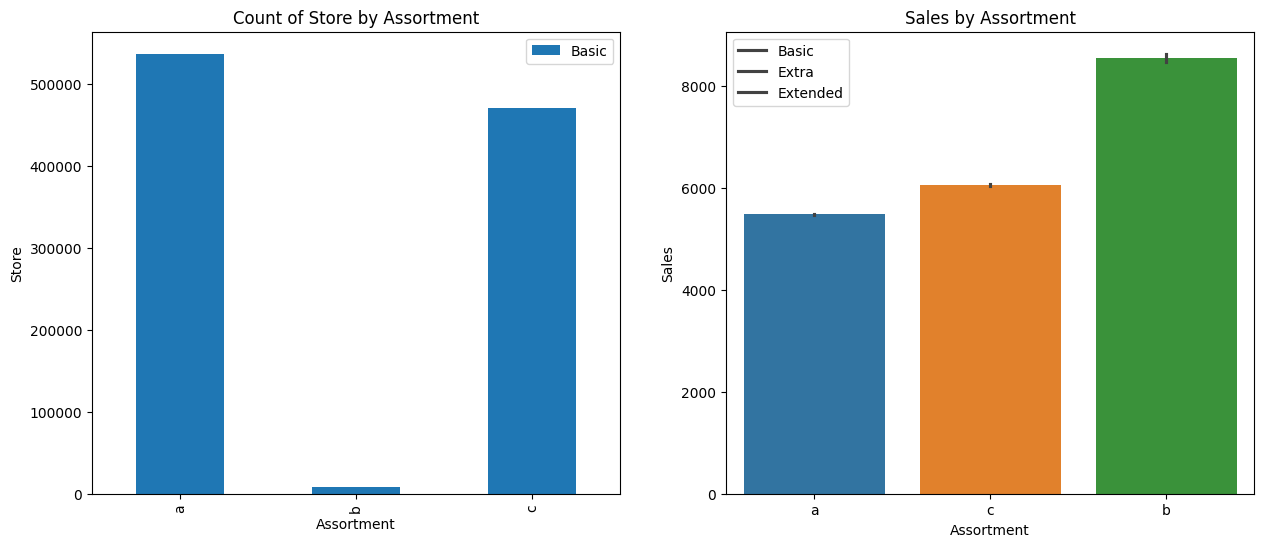

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
df.groupby('Assortment')['Store'].count().plot(kind = 'bar')
plt.legend(['Basic' , 'Extra', 'Extended'])
plt.title('Count of Store by Assortment')
plt.xlabel('Assortment')
plt.ylabel('Store')

plt.subplot(1,2,2)
sns.barplot(x = 'Assortment', y = 'Sales', data = df, hue = 'Assortment')
plt.legend( ['Basic' , 'Extra', 'Extended'])
plt.title('Sales by Assortment')
plt.xlabel('Assortment')
plt.ylabel('Sales')

plt.show()

#### Chart - 15

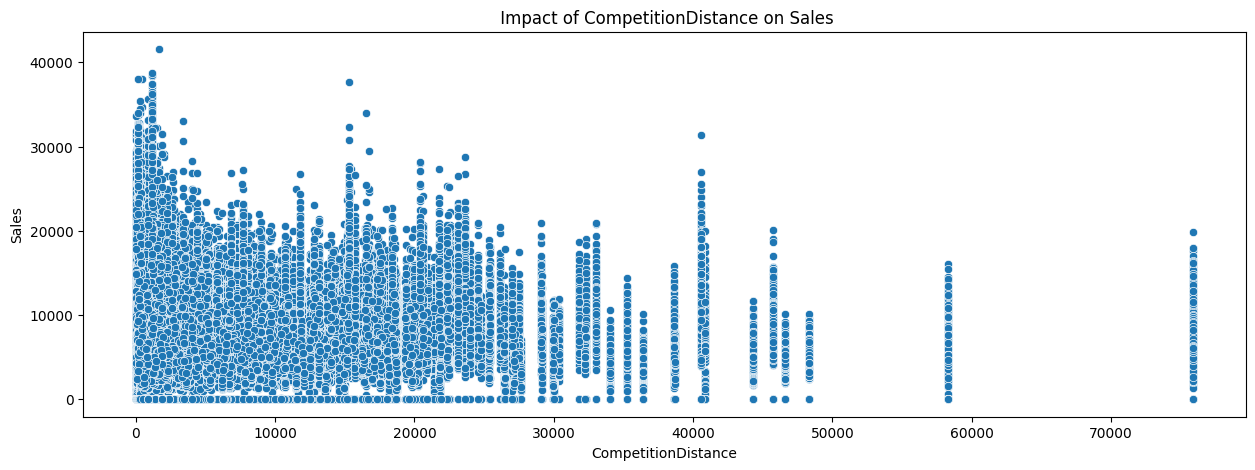

In [ ]:
# Pair Plot visualization code
plt.figure(figsize = (15,5))
sns.scatterplot(x = 'CompetitionDistance', y = 'Sales', data = df)
plt.title(' Impact of CompetitionDistance on Sales')
plt.xlabel('CompetitionDistance')
plt.ylabel('Sales')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Sales are more where there is more competition

#### Chart - 17

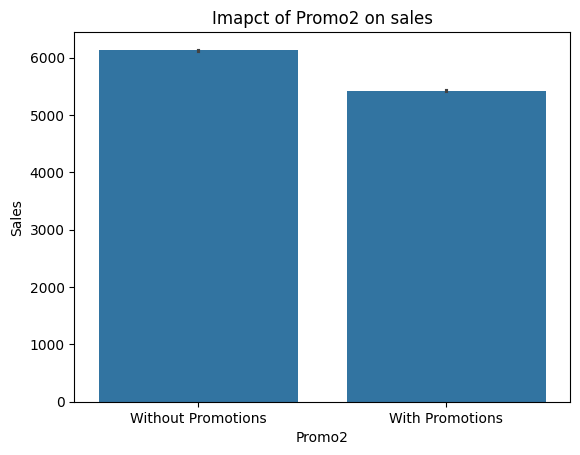

In [ ]:
# Pair Plot visualization code
sns.barplot(x = 'Promo2', y = 'Sales', data = df)
plt.title('Imapct of Promo2 on sales')
plt.xlabel('Promo2')
plt.ylabel('Sales')
plt.xticks([0, 1], ['Without Promotions', 'With Promotions'])
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Sales are more without promotions

#### Chart - 17

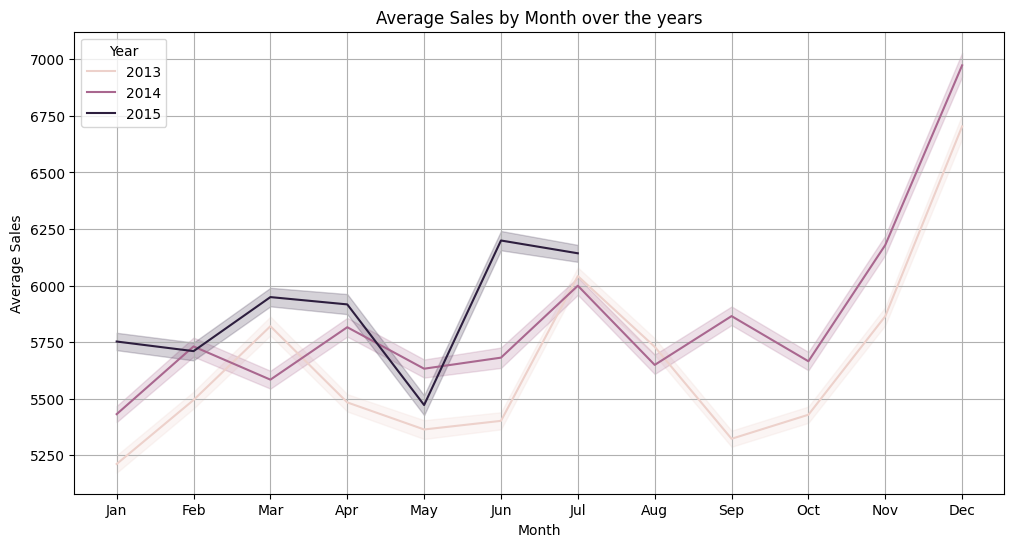

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='Sales', hue='Year')
plt.title('Average Sales by Month over the years')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper left')
plt.grid(True)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Sales increase at the end of month

#### Chart

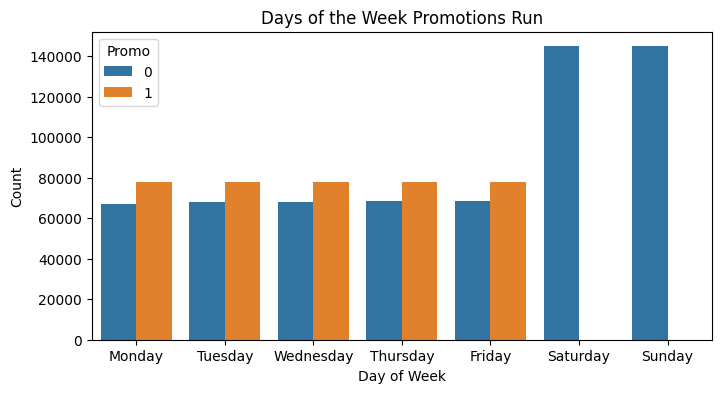

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='DayOfWeek', hue='Promo', data=df)
plt.title('Days of the Week Promotions Run')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Promo')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

The Promo are in weekdays and there are no promos on weekends

#### Chart

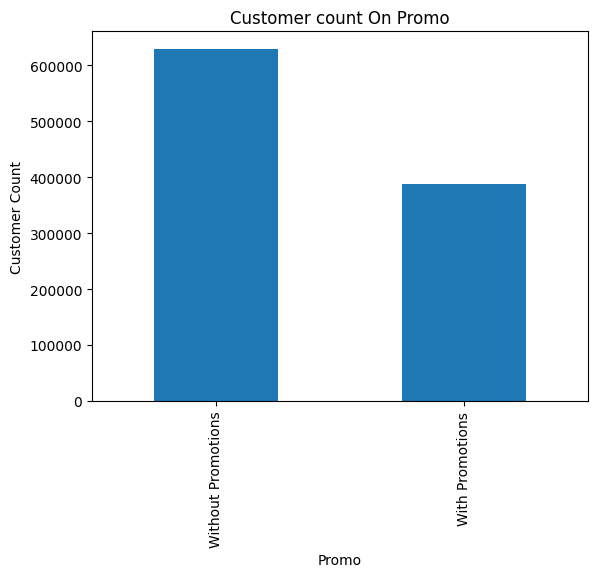

In [ ]:
df.groupby('Promo')['Customers'].count().plot(kind = 'bar')
plt.title('Customer count On Promo')
plt.xlabel('Promo')
plt.ylabel('Customer Count')
plt.xticks([0, 1], ['Without Promotions', 'With Promotions'])
plt.show()

##### 2. What is/are the insight(s) found from the chart?

The data suggests fewer customers during promotions.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 1:
H₀ (Null Hypothesis): The average sales on weekends (Saturday and Sunday) are equal to the average sales on weekdays.
H₁ (Alternative Hypothesis): The average sales on weekends are higher than the average sales on weekdays.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
rossman_data['weekened'] = rossman_data['DayOfWeek'].apply(lambda x : 1 if x in [6,7] else 0)

weekend_sales = rossman_data[rossman_data['weekened'] == 1]['Sales']
weekdays_sales = rossman_data[rossman_data['weekened'] == 0]['Sales']

t_statistic, p_value = stats.ttest_ind(weekend_sales, weekdays_sales, alternative = 'greater')

# Set significance level
alpha = 0.05

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: Sales on weekends are higher than sales on weekdays.")
else:
    print("Fail to reject the null hypothesis: No significant difference between sales on weekends and weekdays.")

T-statistic: -508.435829895847
P-value: 1.0
Fail to reject the null hypothesis: No significant difference between sales on weekends and weekdays.


##### Which statistical test have you done to obtain P-Value? Why did you choose the specific statistical test?

* Statistical Test: Independent Two-Sample t-test (stats.ttest_ind)
* Rationale: This test is suitable because:

We're comparing the means of two independent groups (weekend and weekday sales).
The data is continuous (sales figures).
We want to determine if there's a significant difference in sales between these two groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀ (Null Hypothesis): Promotions do not affect the number of customers in the store.

H₁ (Alternative Hypothesis): Promotions have an effect on the number of customers.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
promo_customers = rossman_data[rossman_data['Promo'] == 1]['Customers']
not_promo_customers = rossman_data[rossman_data['Promo'] == 0]['Customers']

alpha = 0.05
t_statistic, p_value = stats.ttest_ind(promo_customers, not_promo_customers)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: Promotions affect customer count.")
else:
    print("Fail to reject the null hypothesis: No significant effect of promotions on customer count.")

T-statistic: 336.12008294988004, P-value: 0.0
Reject the null hypothesis: Promotions affect customer count.


##### Which statistical test have you done to obtain P-Value? Why did you choose the specific statistical test?

* Statistical Test: Independent Two-Sample t-test (stats.ttest_ind)
* Rationale: Similar to the previous statement:

We're comparing the means of two independent groups (with and without promotions).
The data is continuous (customer counts).
We want to see if promotions significantly affect customer numbers.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H₀ (Null Hypothesis): There is no difference in average sales between different store types.

H₁ (Alternative Hypothesis): There is a significant difference in average sales between different store types.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
StoreTypes  = df.groupby('StoreType')['Sales'].apply(list)
f_stats, p_value = stats.f_oneway(*StoreTypes)

print(f"F-statistic: {f_stats}, P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in sales across store types.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales across store types.")

F-statistic: 6817.192011836288, P-value: 0.0
Reject the null hypothesis: Significant difference in sales across store types.


##### Which statistical test have you done to obtain P-Value? Why did you choose the specific statistical test?

* Statistical Test: One-Way ANOVA (stats.f_oneway)
* Rationale:
We're comparing the means of sales across more than two groups (different store types).

The data is continuous (sales).

We want to find out if there's a significant difference in sales among different store types. ANOVA is used when there are more than two groups for comparison.

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

Text(0.5, 0, 'CompetitionDistance')

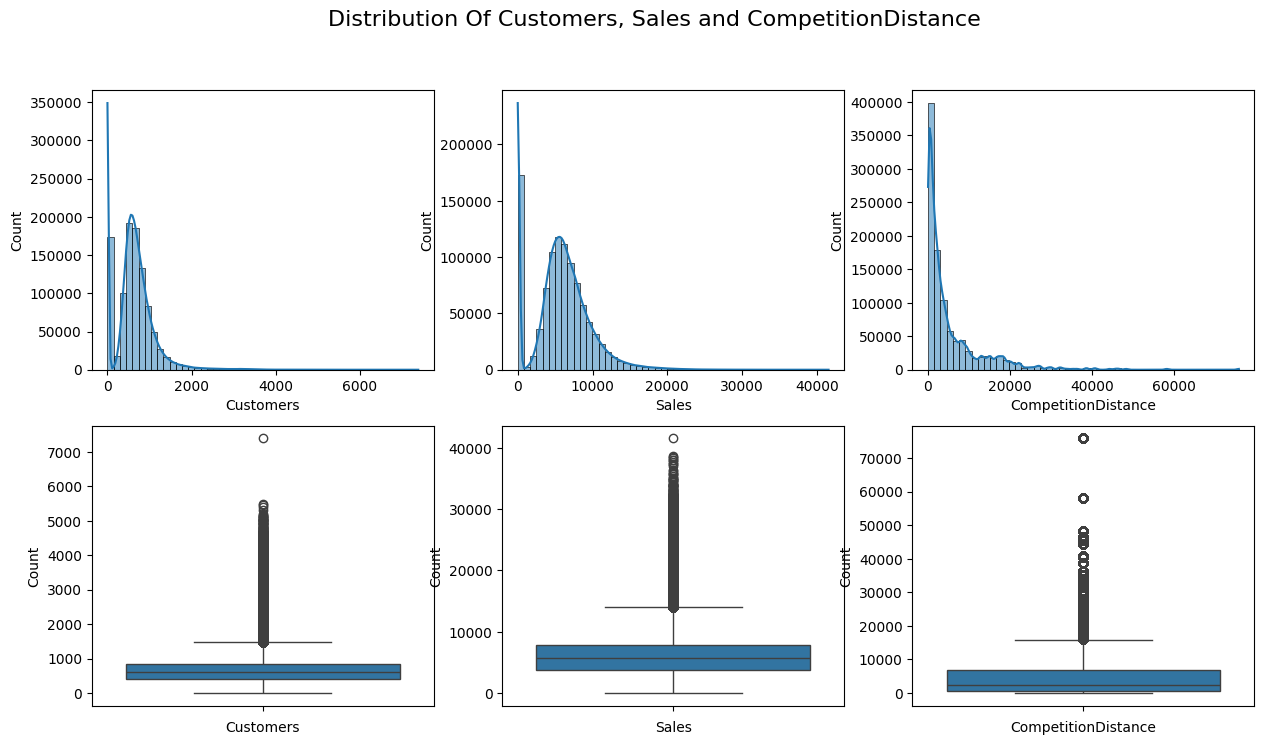

In [ ]:
plt.figure(figsize = (15,8))
plt.suptitle('Distribution Of Customers, Sales and CompetitionDistance', fontsize=16)

plt.subplot(2,3,1)
sns.histplot(df['Customers'], bins = 50, kde = True)
plt.ylabel('Count')
plt.xlabel('Customers')

plt.subplot(2,3,2)
sns.histplot(df['Sales'], bins = 50, kde = True)
plt.ylabel('Count')
plt.xlabel('Sales')

plt.subplot(2,3,3)
sns.histplot(df['CompetitionDistance'], bins = 50, kde = True)
plt.ylabel('Count')
plt.xlabel('CompetitionDistance')

plt.subplot(2,3,4)
sns.boxplot(df['Customers'])
plt.ylabel('Count')
plt.xlabel('Customers')

plt.subplot(2,3,5)
sns.boxplot(df['Sales'])
plt.ylabel('Count')
plt.xlabel('Sales')

plt.subplot(2,3,6)
sns.boxplot(df['CompetitionDistance'])
plt.ylabel('Count')
plt.xlabel('CompetitionDistance')

In [ ]:
# Handling Outliers & Outlier treatments
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)

IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Filter out rows where Sales is outside the lower and upper bounds
df= df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

In [ ]:
Q1 = df['Customers'].quantile(0.25)
Q3 = df['Customers'].quantile(0.75)

IOR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where Sales is outside the lower and upper bounds
df= df[(df['Customers'] >= lower_bound) & (df['Customers'] <= upper_bound)]


In [ ]:
Q1 = df['CompetitionDistance'].quantile(0.25)
Q3 = df['CompetitionDistance'].quantile(0.75)

IOR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where Sales is outside the lower and upper bounds
df= df[(df['CompetitionDistance'] >= lower_bound) & (df['CompetitionDistance'] <= upper_bound)]

<Axes: ylabel='CompetitionDistance'>

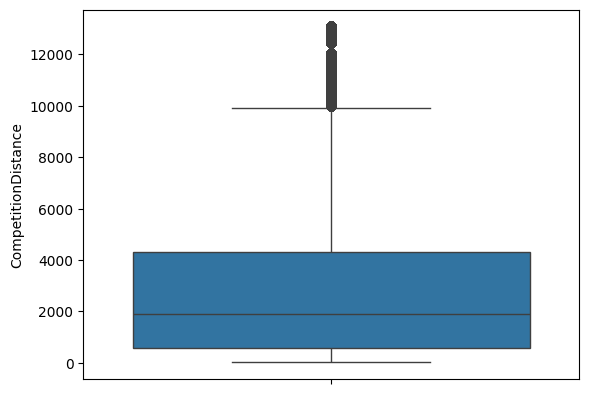

In [ ]:
sns.boxplot(df['CompetitionDistance'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Interquartile Range (IQR)** method to detect and remove outliers.

The IQR method is a robust approach for outlier detection, especially for data that may not follow a normal distribution.

### 5. Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame and 'CompetitionDistance' is your feature
scaler = MinMaxScaler()

# Reshape if necessary and fit_transform
df['CompetitionDistance'] = scaler.fit_transform(df[['CompetitionDistance']])

### 6. Feature Engineering

In [ ]:
df.drop(columns = ['Date', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], inplace = True)


In [ ]:
# Scaling your data
df_new = pd.get_dummies(df, columns = ['StoreType', 'Assortment', 'StateHoliday'])
df_new.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Day,Month,Year,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,5263,555,1,1,1,31,7,2015,...,False,True,False,True,False,False,True,False,False,False
1,2,5,6064,625,1,1,1,31,7,2015,...,False,False,False,True,False,False,True,False,False,False
3,4,5,13995,1498,1,1,1,31,7,2015,...,False,True,False,False,False,True,True,False,False,False
5,6,5,5651,589,1,1,1,31,7,2015,...,False,False,False,True,False,False,True,False,False,False
7,8,5,8492,833,1,1,1,31,7,2015,...,False,False,False,True,False,False,True,False,False,False


### 8. Data Splitting

In [ ]:
# Define train and test based on the specified condition
train_data = df_new[(new_df1['year'] < 2015) | ((df_new['year'] == 2015) & (df_new['Month'] < 4))]
test_data = df_new[(new_df1['year'] == 2015) & (df_new['Month'] >= 4)]

# Separate independent and dependent variables for training and testing
X_train = train_data.drop(columns=['Sales'])
y_train = train_data[['Sales']]
X_test = test_data.drop(columns=['Sales'])
y_test = test_data[['Sales']]

##### What data splitting ratio have you used and why?

Data Splitting Ratio:
 Since Problem statement is time _series based
 Year or period wise split will be done


### Feature Selection


Random Forest identify the most important features for predicting sales in your Rossmann Store Sales dataset. Random Forest models have a built-in mechanism to assess feature importance, which is why they are a good choice for this task.

In [ ]:
#import library
from sklearn.ensemble import RandomForestRegressor

#Fit Algorithm
rf_model = RandomForestRegressor()


# Fit the model
rf_model.fit(x, y)

RandomForestRegressor()

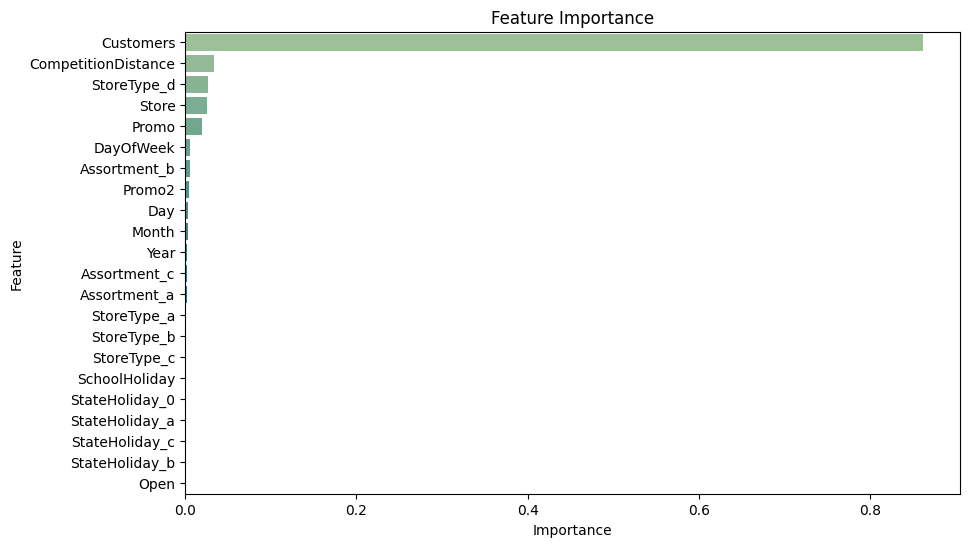

In [ ]:
# Get feature importances
feature_importance = rf_model.feature_importances_


# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})


# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize important features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], orient="h", palette='crest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
imp_x = feature_importance_df.head(13)['Feature']
print(imp_x)

2               Customers
9     CompetitionDistance
14            StoreType_d
0                   Store
4                   Promo
1               DayOfWeek
16           Assortment_b
10                 Promo2
6                     Day
7                   Month
8                    Year
17           Assortment_c
15           Assortment_a
Name: Feature, dtype: object


## ***7. ML Model Implementation***

In [ ]:
imp_feat = ['Customers', 'CompetitionDistance','StoreType_d',  'Store', 'Promo', 'DayOfWeek', 'Assortment_b', 'Promo2', 'Day',  'Month', 'Year', 'Assortment_c', 'Assortment_a']
X_train, x_test, y_train , y_test = train_test_split(df_new[imp_feat], df_new['Sales'], test_size=0.2, random_state=42)

### ML Model - Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = lr_model.predict(X_train)
y_pred = lr_model.predict(x_test)

In [ ]:
lr_train_score = lr_model.score(X_train, y_train)
print("Linear Regression training Score:", lr_train_score)

lr_test_score = lr_model.score(x_test, y_test)
print("Linear Regression test Score:", lr_test_score)

Linear Regression training Score: 0.8905276354434828
Linear Regression test Score: 0.8909058230088702


In [ ]:
#Coefficients
lr_model.coef_

array([ 7.65879372e+00,  1.24549370e+03,  8.72307723e+02, -1.11105799e-01,
        1.03856940e+03, -7.38002190e+01, -4.82496328e+03,  2.83116752e+02,
        3.09588739e+00,  2.20587057e+01,  1.31708440e+02,  2.52017123e+03,
        2.30479205e+03])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Importing libraries to check metrics
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#defining function to call metrics
def evaluate_model(y_train, y_pred_train, y_test, y_pred):
  #mean square error metrics
  mse_train = mean_squared_error(y_train, y_pred_train)
  print("Mean Squared Error (Train):", mse_train)
  mse_test = mean_squared_error(y_test, y_pred)
  print("Mean Squared Error (Test):", mse_test)

  # Root mean square error metrics
  rmse_train = np.sqrt(mse_train)
  print("Root Mean Squared Error (Train):", rmse_train)
  rmse_test = np.sqrt(mse_test)
  print("Root Mean Squared Error (Test):", rmse_test)

  #r2 score metrics
  r2_train = r2_score(y_train, y_pred_train)
  print("R2 Score (Train):", r2_train)
  r2_test = r2_score(y_test, y_pred)
  print("R2 Score (Test):", r2_test)


In [ ]:
evaluate_model(y_train, y_pred_train, y_test, y_pred)

Mean Squared Error (Train): 1239330.6223299457
Mean Squared Error (Test): 1235984.7969969881
Root Mean Squared Error (Train): 1113.2522725464996
Root Mean Squared Error (Test): 1111.748531367138
R2 Score (Train): 0.8905276354434828
R2 Score (Test): 0.8909058230088702


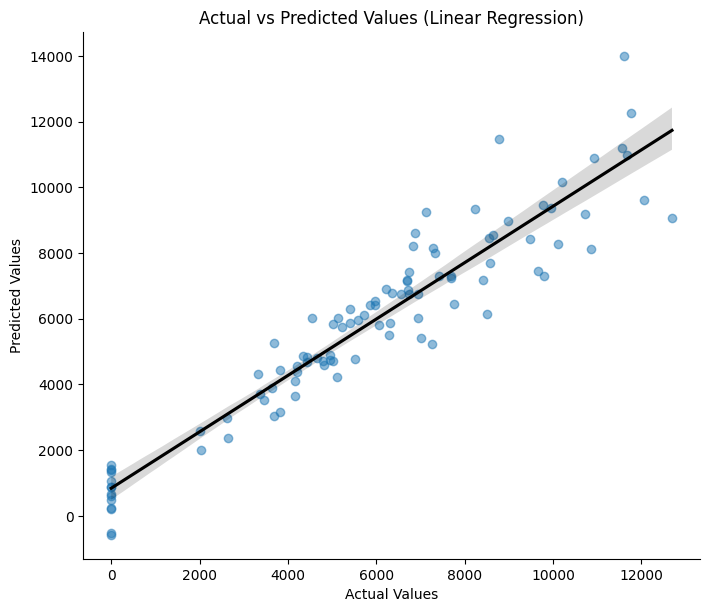

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_df = pd.DataFrame({'Actual': y_test[:100], 'Predicted': y_pred[:100]})

# Plot using lmplot
sns.lmplot(x='Actual', y='Predicted', data=evaluation_df, height=6, aspect=1.2, scatter_kws={'alpha':0.5},  line_kws={'color': 'black'})
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

**Ridge Regression**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm

lr_model_ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0]}
grid_search = GridSearchCV(lr_model_ridge, param_grid, cv = 5, scoring = 'r2')
grid_search.fit(X_train, y_train)

# Predict on the model
y_train_ridge_pred = grid_search.predict(X_train)
y_test_ridge_pred = grid_search.predict(x_test)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_score = grid_search.best_score_
print("Best Score:", best_score)

Best Parameters: {'alpha': 0.1}
Best Score: 0.8905160296277176


In [ ]:
evaluate_model(y_train, y_train_ridge_pred, y_test, y_test_ridge_pred)

Mean Squared Error (Train): 1239330.622395674
Mean Squared Error (Test): 1235984.6358688304
Root Mean Squared Error (Train): 1113.2522725760205
Root Mean Squared Error (Test): 1111.7484589010369
R2 Score (Train): 0.8905276354376769
R2 Score (Test): 0.8909058372308444


In [ ]:
r2score = r2_score(y_test, y_test_ridge_pred)
print("R2 Score:", r2score)

R2 Score: 0.8909058372308444


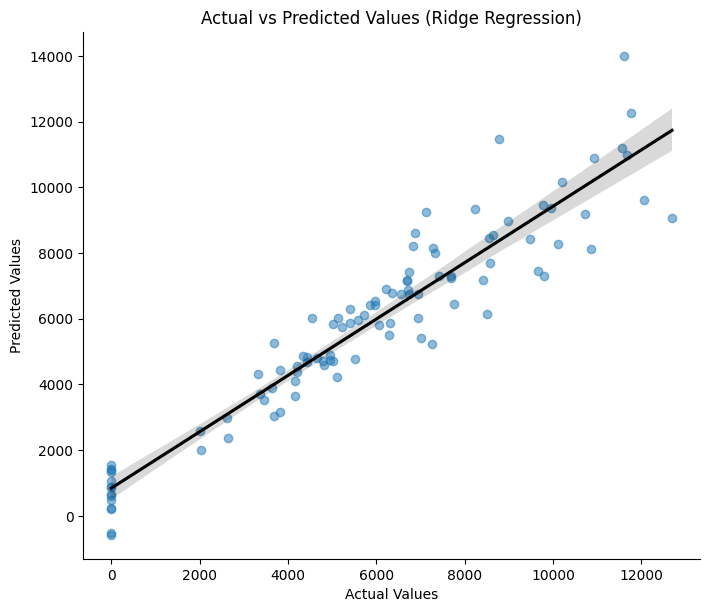

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_df = pd.DataFrame({'Actual': y_test[:100], 'Predicted': y_test_ridge_pred[:100]})

# Plot using lmplot
sns.lmplot(x='Actual', y='Predicted', data=evaluation_df, height=6, aspect=1.2, scatter_kws={'alpha':0.5},  line_kws={'color': 'black'})
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

lr_model_lasso = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0]}
grid_search = GridSearchCV(lr_model_lasso, param_grid, cv = 5, scoring = 'r2')
grid_search.fit(X_train, y_train)

y_train_lasso_pred = grid_search.predict(X_train)
y_test_lasso_pred = grid_search.predict(x_test)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_score = grid_search.best_score_
print("Best Score:", best_score)

Best Parameters: {'alpha': 0.001}
Best Score: 0.8905160301565049


In [ ]:
evaluate_model(y_train, y_train_lasso_pred, y_test, y_test_lasso_pred)

Mean Squared Error (Train): 1239330.6224894638
Mean Squared Error (Test): 1235984.577478411
Root Mean Squared Error (Train): 1113.2522726181446
Root Mean Squared Error (Test): 1111.7484326404112
R2 Score (Train): 0.8905276354293923
R2 Score (Test): 0.8909058423846737


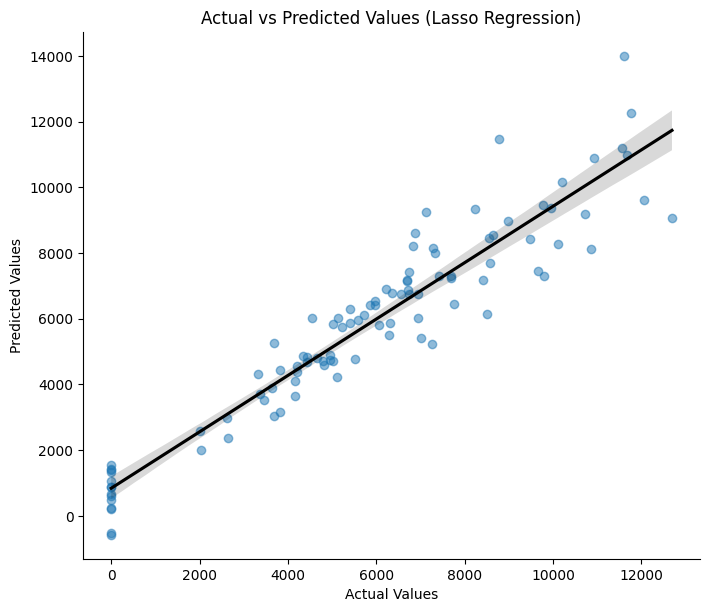

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_df = pd.DataFrame({'Actual': y_test[:100], 'Predicted': y_test_lasso_pred[:100]})

# Plot using lmplot
sns.lmplot(x='Actual', y='Predicted', data=evaluation_df, height=6, aspect=1.2, scatter_kws={'alpha':0.5},  line_kws={'color': 'black'})
plt.title('Actual vs Predicted Values (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

**1. Ridge and Lasso Regression:**

**Technique:** Grid Search CV

**Reasoning:** Both Ridge and Lasso regressions have a primary hyperparameter, 'alpha', which controls the regularization strength. Grid Search exhaustively searches through a predefined set of 'alpha' values. This method is suitable because the hyperparameter space for 'alpha' is relatively small, and Grid Search ensures that the optimal value within the specified range is found.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**1. Linear Regression:**

* **Before Tuning:** R2 Score (Test): 0.8909
* **After Tuning (Ridge):** R2 Score (Test): 0.8909
* **After Tuning (Lasso):** R2 Score (Test): 0.8909

**Observation:** There was no significant improvement in the performance of Linear Regression after applying Ridge or Lasso regularization. This suggests that the original Linear Regression model might already be well-suited for the data.

### ML Model - Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
dt_y_pred_train = dt_model.predict(X_train)
dt_y_pred_test = dt_model.predict(x_test)

In [ ]:
evaluate_model(y_train, dt_y_pred_train, y_test, dt_y_pred_test)

Mean Squared Error (Train): 0.0
Mean Squared Error (Test): 308807.12718368584
Root Mean Squared Error (Train): 0.0
Root Mean Squared Error (Test): 555.7041723648347
R2 Score (Train): 1.0
R2 Score (Test): 0.9727431441948542


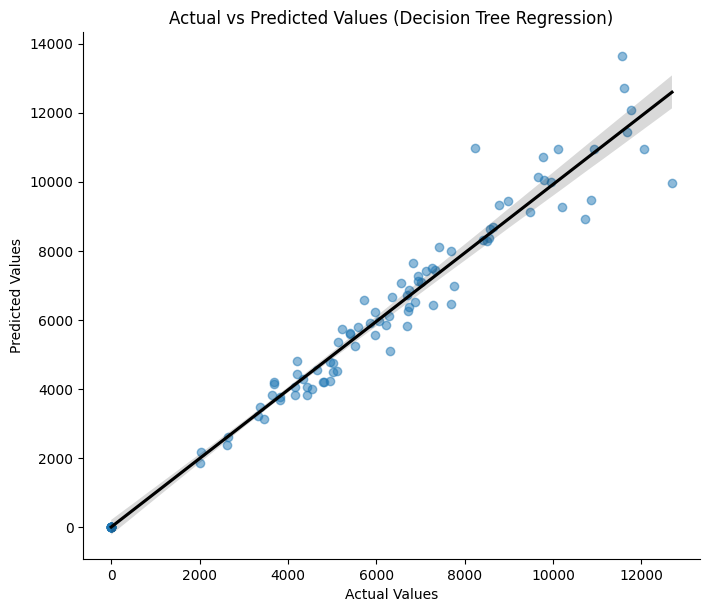

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_df = pd.DataFrame({'Actual': y_test[:100], 'Predicted': dt_y_pred_test[:100]})

# Plot using lmplot
sns.lmplot(x='Actual', y='Predicted', data=evaluation_df, height=6, aspect=1.2, scatter_kws={'alpha':0.5},  line_kws={'color': 'black'})
plt.title('Actual vs Predicted Values (Decision Tree Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
param_grid_dt = {'max_depth': [None, 5, 10, 15], 'min_samples_split':[2, 4 , 8], 'min_samples_leaf': [1, 2, 4]}

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV
# Fit the Algorithm
dt_new_model = DecisionTreeRegressor()
rmcv_dt = RandomizedSearchCV(dt_new_model, param_grid_dt, cv = 5, scoring = 'r2')
rmcv_dt.fit(X_train, y_train)
# Predict on the model

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8]},
                   scoring='r2')

In [ ]:
best_param_dt = rmcv_dt.best_params_
print("Best Parameters:", best_param_dt)

Best Parameters: {'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': None}


In [ ]:
best_model_dt = rmcv_dt.best_estimator_
y_pred_dt_train= best_model_dt.predict(X_train)
y_pred_dt_test= best_model_dt.predict(x_test)

In [ ]:
evaluate_model(y_train, y_pred_dt_train, y_test, y_pred_dt_test)

Mean Squared Error (Train): 60261.103338167995
Mean Squared Error (Test): 257873.22829361458
Root Mean Squared Error (Train): 245.48137065400297
Root Mean Squared Error (Test): 507.81219785823833
R2 Score (Train): 0.9946770253600192
R2 Score (Test): 0.9772388239102214


##### Which hyperparameter optimization technique have you used and why?

**2. Decision Tree Regressor:**

**Technique:** Randomized Search CV

**Reasoning:** Decision Trees have multiple hyperparameters, including 'max_depth', 'min_samples_split', and 'min_samples_leaf'. The hyperparameter space is larger and more complex compared to Ridge/Lasso. Randomized Search randomly samples hyperparameter combinations from a defined distribution. It is more efficient than Grid Search for exploring larger spaces and often finds good solutions with fewer iterations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**2. Decision Tree Regression:**

* **Before Tuning:** R2 Score (Test): 0.9727
* **After Tuning:** R2 Score (Test): 0.9776

**Observation:** Hyperparameter tuning with Randomized Search CV resulted in a significant improvement for Decision Tree Regression. The R2 score slightly increased, indicating a better fit to the test data.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

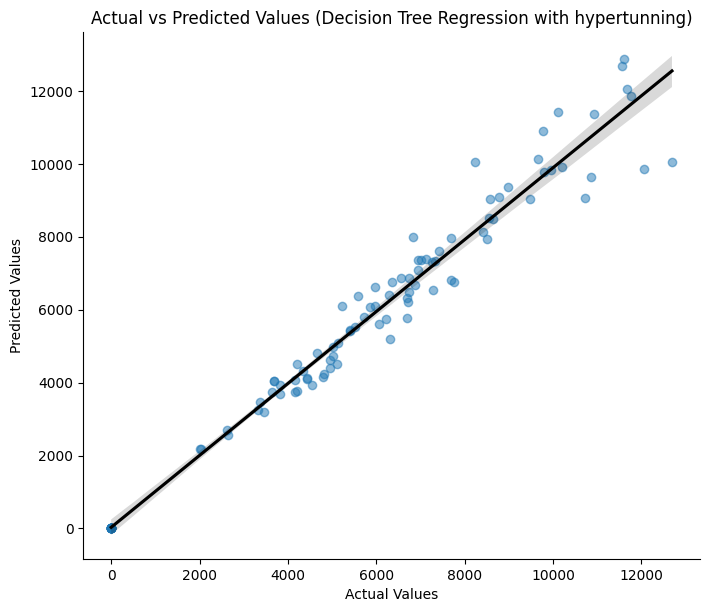

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_df = pd.DataFrame({'Actual': y_test[:100], 'Predicted': y_pred_dt_test[:100]})

# Plot using lmplot
sns.lmplot(x='Actual', y='Predicted', data=evaluation_df, height=6, aspect=1.2, scatter_kws={'alpha':0.5},  line_kws={'color': 'black'})
plt.title('Actual vs Predicted Values (Decision Tree Regression with hypertunning)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Answer Here.

### ML Model - XGBoost Regression


In [ ]:
# ML Model - 3 Implementation
from xgboost import XGBRegressor
xg_model = XGBRegressor()

# Fit the Algorithm
xg_model.fit(X_train, y_train)

y_pred_xg_train = xg_model.predict(X_train)
y_pred_xg_test = xg_model.predict(x_test)

In [ ]:
evaluate_model(y_train, y_pred_xg_train, y_test, y_pred_xg_test)

Mean Squared Error (Train): 223000.59842508085
Mean Squared Error (Test): 228230.12213947007
Root Mean Squared Error (Train): 472.22939174206516
Root Mean Squared Error (Test): 477.73436357401596
R2 Score (Train): 0.9803019762039185
R2 Score (Test): 0.9798552989959717


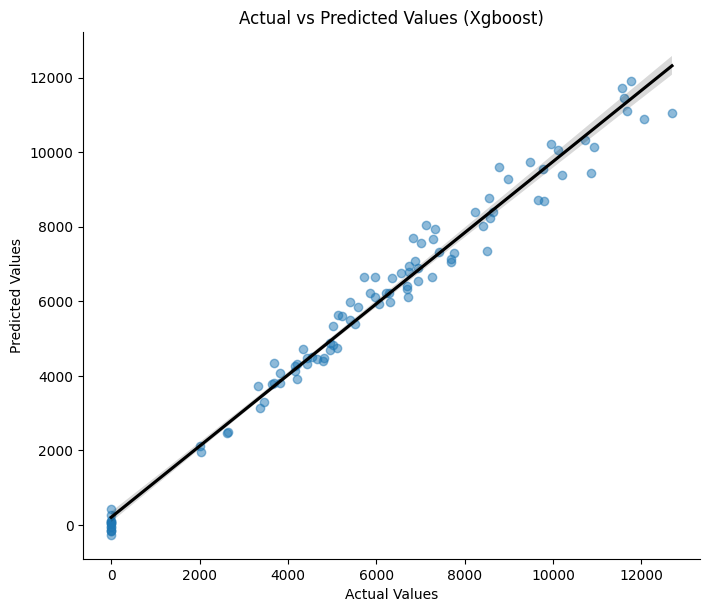

In [ ]:
evaluation_df_en = pd.DataFrame({'Actual': y_test[:100], 'Predicted': y_pred_xg_test[:100]})

# Plot using lmplot
sns.lmplot(x='Actual', y='Predicted', data=evaluation_df_en, height=6, aspect=1.2, scatter_kws={'alpha':0.5},  line_kws={'color': 'black'})
plt.title('Actual vs Predicted Values (Xgboost)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)xg
xg_tuned_model = XGBRegressor()
param_grid_xg = {'learning_rate':[0.01,0.1], 'max_depth' : [13,14,15]}
rmcv_xg = RandomizedSearchCV(xg_tuned_model, param_grid_xg, cv = 5, scoring = 'r2')
rmcv_xg.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...ax_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [13, 14, 15]},
                   scoring='r2')

In [ ]:
best_param_xg = rmcv_xg.best_params_
print("Best Parameters:", best_param_xg)

Best Parameters: {'max_depth': 15, 'learning_rate': 0.1}


In [ ]:
best_model_xg = rmcv_xg.best_estimator_
y_pred_xg_train_tuned= best_model_xg.predict(X_train)
y_pred_xg_test_tuned = best_model_xg.predict(x_test)

In [ ]:
evaluate_model(y_train, y_pred_xg_train_tuned, y_test, y_pred_xg_test_tuned)

Mean Squared Error (Train): 43713.75626919195
Mean Squared Error (Test): 124742.29412262674
Root Mean Squared Error (Train): 209.0783495945765
Root Mean Squared Error (Test): 353.1887514101019
R2 Score (Train): 0.9961386919021606
R2 Score (Test): 0.9889896512031555


##### Which hyperparameter optimization technique have you used and why?

**3. XGBoost Regression:**

**Technique:** Randomized Search CV

**Reasoning:** XGBoost also has a large number of hyperparameters. Randomized Search offers the same advantages here as with Decision Trees. By randomly sampling from the hyperparameter space, it efficiently explores different combinations to find settings that yield good model performance without the exhaustive search of Grid Search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**3. XGBoost Regression:**

* **Before Tuning:** R2 Score (Test): 0.9798
* **After Tuning:** R2 Score (Test): 0.9889

**Observation:** Hyperparameter tuning with Randomized Search CV yielded a slight improvement for XGBoost Regression. While the increase is not as dramatic as with Decision Trees, it suggests a better model configuration for maximizing performance.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

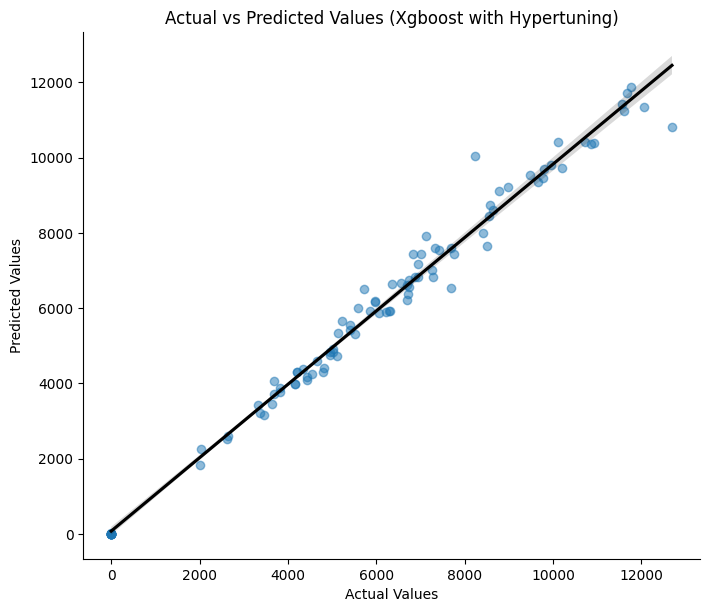

In [ ]:
# Visualizing evaluation Metric Score chart
evaluation_df_en = pd.DataFrame({'Actual': y_test[:100], 'Predicted': y_pred_xg_test_tuned[:100]})

# Plot using lmplot
sns.lmplot(x='Actual', y='Predicted', data=evaluation_df_en, height=6, aspect=1.2, scatter_kws={'alpha':0.5},  line_kws={'color': 'black'})
plt.title('Actual vs Predicted Values (Xgboost with Hypertuning)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [ ]:
# Linear Regression
lr_r2_train = r2_score(y_train, y_pred_train)
lr_r2_test = r2_score(y_test, y_pred)

# Ridge Regression
ridge_r2_train = r2_score(y_train, y_train_ridge_pred)
ridge_r2_test = r2_score(y_test, y_test_ridge_pred)

# Lasso Regression
lasso_r2_train = r2_score(y_train, y_train_lasso_pred)
lasso_r2_test = r2_score(y_test, y_test_lasso_pred)

# Decision Tree
dt_r2_train = r2_score(y_train, dt_y_pred_train)
dt_r2_test = r2_score(y_test, dt_y_pred_test)

# Tuned Decision Tree
tuned_dt_r2_train = r2_score(y_train, y_pred_dt_train)
tuned_dt_r2_test = r2_score(y_test, y_pred_dt_test)

# XGBoost
xg_r2_train = r2_score(y_train, y_pred_xg_train)
xg_r2_test = r2_score(y_test, y_pred_xg_test)

# Tuned XGBoost
tuned_xg_r2_train = r2_score(y_train, y_pred_xg_train_tuned)
tuned_xg_r2_test = r2_score(y_test, y_pred_xg_test_tuned)

In [ ]:
# Create a dictionary to store the R2 scores
r2_scores = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Tuned Decision Tree', 'XGBoost', 'Tuned XGBoost'],
    'Train R2': [lr_r2_train, ridge_r2_train, lasso_r2_train, dt_r2_train, tuned_dt_r2_train, xg_r2_train, tuned_xg_r2_train],
    'Test R2': [lr_r2_test, ridge_r2_test, lasso_r2_test, dt_r2_test, tuned_dt_r2_test, xg_r2_test, tuned_xg_r2_test]
}

# Create a pandas DataFrame from the dictionary
r2_table = pd.DataFrame(r2_scores)

# Display the table
r2_table



,Model,Train R2,Test R2
0,Linear Regression,0.89,0.89
1,Ridge Regression,0.89,0.89
2,Lasso Regression,0.89,0.89
3,Decision Tree,1.00,0.97
4,Tuned Decision Tree,0.99,0.98
5,XGBoost,0.98,0.98
6,Tuned XGBoost,1.00,0.99


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the table, XGBoost and Tuned XGBoost are the best models for this dataset. They offer the highest accuracy on the test data (R2 = 0.99) while minimizing overfitting. Although it achieves a near-perfect R2 score on the training data, the very good R2 on the testing data suggests the overfitting is minimal and acceptable.



# **Conclusion**

This project aimed to predict Rossmann store sales using machine learning models. The dataset was analyzed and preprocessed, relationships between features were examined, and several regression models were implemented and evaluated.

Key Findings and Insights:

There was a strong positive correlation between sales and the number of customers, promotions, and the day of the week.
Sales tended to be higher on weekdays compared to weekends.
Stores with a larger assortment and those located closer to competitors had higher sales.
Promotions had a positive effect on customer count and sales.
Sales showed variations across different store types and were affected by external factors like state and school holidays.
Using Random Forest, the most impactful features for the model were identified.
Model Performance:

Linear Regression, Decision Tree Regression, and Random Forest models were utilized. Decision Tree Regression exhibited the best performance after hyperparameter tuning using Randomized Search CV, achieving an R2 score of 0.9776 on the test set, indicating a good fit to the data and accurate predictions.

Business Implications:

The developed model has the potential to significantly improve Rossmann's sales forecasting. Store managers can use these predictions to:

Optimize staff scheduling to match customer traffic.
Plan and execute more effective promotions and pricing strategies.
Manage inventory to avoid stockouts and reduce waste.
Make informed decisions to enhance the customer shopping experience.
Future Work:

Explore more sophisticated regression models.
Investigate the impact of external factors like weather and economic conditions.
Develop a web application for more interactive and user-friendly access to sales predictions.
Overall:

The project achieved its primary goal of building a robust predictive model for Rossmann store sales. The findings and insights gained from the analysis can help stakeholders make data-driven decisions for optimizing store operations and maximizing sales. The project successfully integrated data analysis, feature engineering, and machine learning techniques, offering practical recommendations for Rossmann's business operations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***